In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv


In [2]:
D_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv")
W_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv")
M_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv")


### We will work with Data of Monthly stock prices 

In [3]:
M_df.head()

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92


## Data Cleaning and Processing

#### Drop Unnecessary Columns

In [4]:
M_df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
M_df.isnull().sum()

Date         0
Price        0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Description of the DataFrame

In [6]:
M_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       120 non-null    object 
 1   Price      120 non-null    float64
 2   High       120 non-null    float64
 3   Low        120 non-null    float64
 4   Close      120 non-null    float64
 5   Volume     120 non-null    int64  
 6   Adj Close  120 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB


In [7]:
M_df.shape


(120, 7)


## Augment data with additional columns


### Add month column


In [8]:
M_df['Month'] = M_df['Date'].str[5:7]
M_df['Month'] = M_df['Month'].astype('int32')
M_df.head()

,Date,Price,High,Low,Close,Volume,Adj Close,Month
0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80,5
1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03,6
2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22,7
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19,8
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92,9



## Data Exploration!


## Question 1: What was the best month for High Stock Prices ?

In [9]:
M_df.sort_values(by=['High'], ascending=False, axis=0, inplace=True)
M_df.head()

,Date,Price,High,Low,Close,Volume,Adj Close,Month
105,2022-02-01,137.59,151.55,124.95,135.06,928126000,135.06,2
102,2021-11-01,148.05,150.97,141.60,141.90,608378000,141.90,11
103,2021-12-01,144.00,149.10,139.32,144.85,619694000,144.85,12
101,2021-10-01,134.45,148.65,131.05,148.05,720758000,148.05,10
104,2022-01-01,145.05,146.49,124.50,135.30,767206000,135.30,1


## Visualization Monthly Data

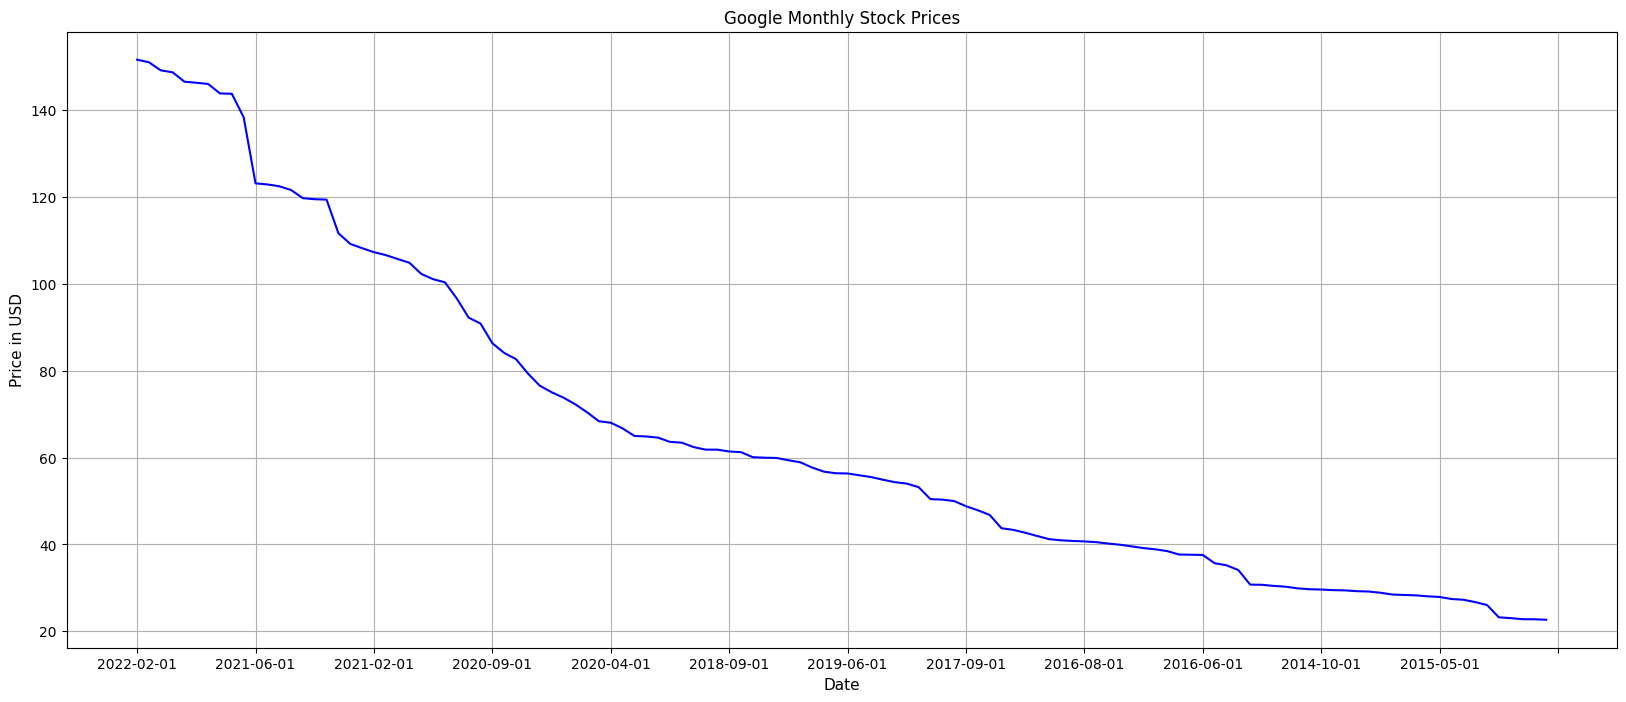

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(M_df['Date'], M_df['High'], color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Google Monthly Stock Prices')
plt.grid()
plt.show()

## Now perform a regression analysis on monthly stock prices data using statsmodels

### Regression Analysis using sklearn

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
# Define the independent variable(s) and dependent variable
X = M_df[['Price', 'High', 'Low', 'Close', 'Volume']]
y = M_df['Adj Close']

In [13]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Fiting the model on the training data
model = LinearRegression().fit(X_train, y_train)


In [15]:
# Predicting the values on the test data
y_pred = model.predict(X_test)

In [16]:
# Compute the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


print("Model coefficients:", model.coef_)


R-squared score: 1.0
Model coefficients: [ 9.76093940e-16 -2.42882171e-16 -1.01251031e-16  1.00000000e+00
  4.63221143e-21]
